In [1]:
from source import seasonalregressor
from source import data_wrangle
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
%matplotlib inline

advanced = data_wrangle.read_all_advanced('./data/advanced')
pergame  = data_wrangle.read_all_pergame('./data/per_game')
seasonal = data_wrangle.clean_and_join_seasonal_dataframe(advanced, pergame)
demographic = data_wrangle.read_demographic_data('./data/player_data.csv')
fullstats = data_wrangle.add_years_in_league(seasonal, demographic)


In [2]:
import importlib

In [4]:
cols_to_train_from_correlation = ['WS',
 'OWS',
 'VORP',
 'DWS',
 'MP_total',
 'PS/G',
 'FG',
 'MP_pergame',
 'GS',
 'FT',
 '2P',
 'FTA',
 'FGA',
 '2PA',
 'DRB']

In [7]:
importlib.reload(seasonalregressor)

<module 'source.seasonalregressor' from '/Users/kv/workspace/kv-capstone/NBAwinshare/source/seasonalregressor.py'>

In [8]:
sr = seasonalregressor.SeasonalRegressor(columns_to_train=cols_to_train_from_correlation)
sr = sr.fit(fullstats,demographic)

Number of players:  578  with full season data for seasons: {1, 2, 3, 4, 5}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 5
Number of players:  496  with full season data for seasons: {1, 2, 3, 4, 5, 6}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 6
Number of players:  421  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DWS', 'MP_total', 'PS/G', 'FG', 'MP_pergame', 'GS', 'FT', '2P', 'FTA', 'FGA', '2PA', 'DRB']
Fitting for year: 7
Number of players:  355  with full season data for seasons: {1, 2, 3, 4, 5, 6, 7, 8}
Indices of train set and to-predict set MATCH
Using columns:  ['WS', 'OWS', 'VORP', 'DW

Feature ranking:
1. feature 0 | WS | (0.351034)
2. feature 1 | OWS | (0.159805)
3. feature 2 | VORP | (0.093928)
4. feature 14 | DRB | (0.059775)
5. feature 8 | GS | (0.044660)
6. feature 4 | MP_total | (0.040274)
7. feature 7 | MP_pergame | (0.036822)
8. feature 6 | FG | (0.032778)
9. feature 3 | DWS | (0.029325)
10. feature 5 | PS/G | (0.029269)
11. feature 10 | 2P | (0.027617)
12. feature 9 | FT | (0.026638)
13. feature 11 | FTA | (0.025268)
14. feature 12 | FGA | (0.023351)
15. feature 13 | 2PA | (0.019457)


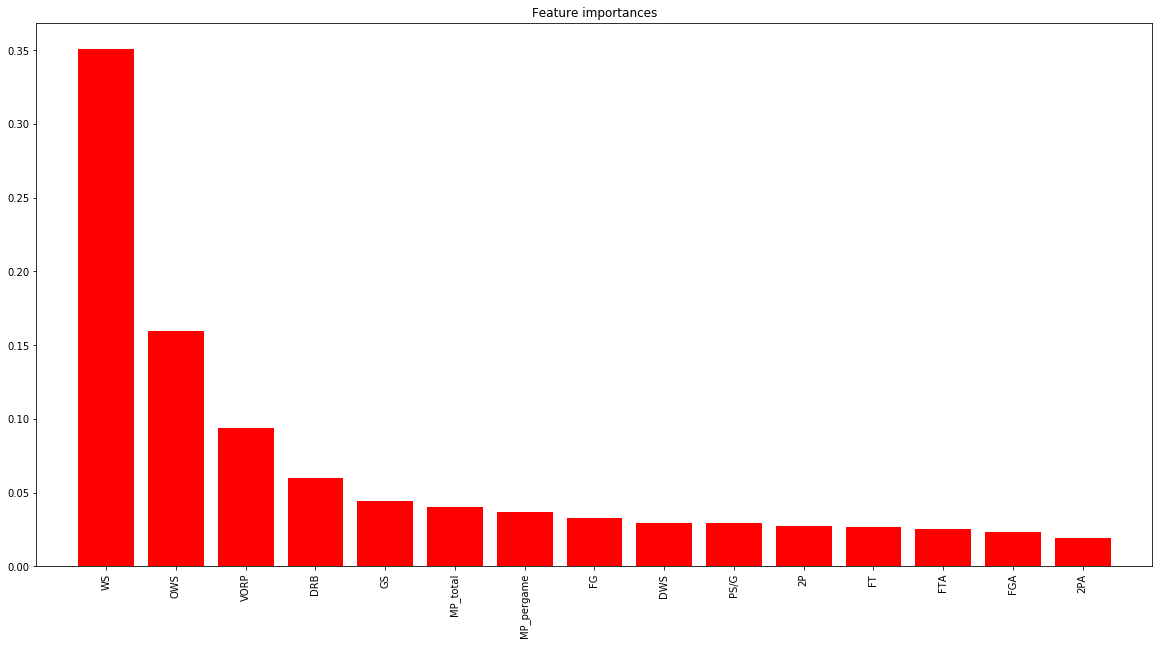

In [10]:
sr.plot_feature_importances(9)